# 水平指定線分近傍の地表面変数・高層大気変数

指定した水平2地点を繋ぐ線分の近くのデータを抽出し, その線分上の地表面変数・高層大気変数の変化を描画するノードブックです.
ここではtutorial/realのヒストリから, 神戸と東京をつなぐ線分上のデータを抽出する例を示します.


## ライブラリの読込
* numpy: 数値計算ライブラリ
* xarray: 
* matplotlib: 描画ライブラリ
* cartopy: 地図ライブラリ
* mod_scale.g_file: SCALE解析ライブラリ(ファイル関係). 現在いるディレクトリにリンクを貼っておく必要がある. (e.g., ln -s /home/hoge/mod_scale ./)

In [1]:
# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mod_scale.g_file import get_xrvar, get_fpathlist
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import os
plt.rcParams["font.size"]=15

## データ情報の設定
* dir1,dir2: scale-rm/test/tutorial/real/experiment/run へのパス
* domainlabel: "_d01"などのドメインラベル. なければ""
* timelabel: "_20070714-210000.000"などの時間ラベル. なければ""
* PRC_NUM_X,PRC_NUM_Y: SCALE実行時に*.confに指定したプロセス数.

In [2]:
# Data setting
dir1 = "./sampledata/scale-5.4.5/scale-rm/test/tutorial/real/experiment/run/"

domainlabel = "_d01"
timelabel = ""

PRC_NUM_X = 2
PRC_NUM_Y = 2

dir_out = "./fig/"
savefig = True

## データ処理の設定
* sfcvarname: 地表面変数
* uppvarname: 高層大気変数
* lon_a,lat_a: ターゲットAの経度, 緯度
* lon_b,lat_b: ターゲットBの経度, 緯度
* dist0: 近傍とみなす水平距離 (km)

In [3]:
# Target surface variable
sfcvarname = "MSLP"
sfcvarunit = "(hPa)"
sfcvarfact = 1e-2

# Target upper air variable
uppvarname = "RH"
uppvarunit = "(%)"
uppvarfact = 1
uppvarlevels = np.linspace(0,100,21)
uppvarcmap = "BrBG"

# Target location
#  r-ccs
lon_a = 135.2207105
lat_a = 34.6533937
# tokyo station
lon_b = 139.7671248
lat_b = 35.6812362

dist0 = 20 # km


# 描画設定

In [4]:

xticks=[130,135,140]
yticks=[30,35,40]
xticks_f = np.array([tmp for tmp in np.arange(np.floor(lon_a)-2,np.ceil(lon_b)+3,2)])
yticks_f = np.array([tmp for tmp in np.arange(np.floor(lat_a)-2,np.ceil(lat_b)+3,2)])


# データ処理
* ファイルの読込

In [5]:
# Read history
fpathlist =  get_fpathlist(dir1,"history",domainlabel,timelabel,PRC_NUM_X,PRC_NUM_Y)
xrvar = get_xrvar(fpathlist)
time = xrvar.coords["time"]
tsize = len(time)
lon = xrvar.coords["lon"]
lat = xrvar.coords["lat"]
z = xrvar.coords["z"]

* 指定地点からの水平距離の計算
* dist_ab: ターゲットAとターゲットBの距離
* dis_a: ターゲットAからの距離
* dis_b: ターゲットBからの距離

In [6]:
# Calculate distance from target
def ll2dist(lat1,lon1,lat2,lon2):
    R = 6371
    return R * np.arccos(
        np.sin(np.radians(lat1))*np.sin(np.radians(lat2))
        +np.cos(np.radians(lat1))*np.cos(np.radians(lat2))*
        np.cos(np.radians(lon1)-np.radians(lon2)))
dist_ab = ll2dist(lat_a,lon_a,lat_b,lon_b)
dist_a = ll2dist(lat_a,lon_a,lat,lon) # distance from target A
dist_b = ll2dist(lat_b,lon_b,lat,lon) # distance from target B


* ターゲットAからの距離とターゲットBからの距離の描画
* ターゲットAからの距離とターゲットBからの距離の和が, ターゲットAとターゲットBの距離に近いグリッドを抽出し, それをターゲットAからの距離でビンする: arg_limは該当するグリッドの水平インデックス

0 , 0-20 km , # of grids: 2
1 , 20-40 km , # of grids: 3
2 , 40-60 km , # of grids: 5
3 , 60-80 km , # of grids: 4
4 , 80-100 km , # of grids: 5
5 , 100-120 km , # of grids: 5
6 , 120-140 km , # of grids: 6
7 , 140-160 km , # of grids: 7
8 , 160-180 km , # of grids: 6
9 , 180-200 km , # of grids: 7
10 , 200-220 km , # of grids: 6
11 , 220-240 km , # of grids: 7
12 , 240-260 km , # of grids: 7
13 , 260-280 km , # of grids: 7
14 , 280-300 km , # of grids: 6
15 , 300-320 km , # of grids: 6
16 , 320-340 km , # of grids: 5
17 , 340-360 km , # of grids: 5
18 , 360-380 km , # of grids: 5
19 , 380-400 km , # of grids: 4
20 , 400-420 km , # of grids: 4
21 , 420-440 km , # of grids: 2


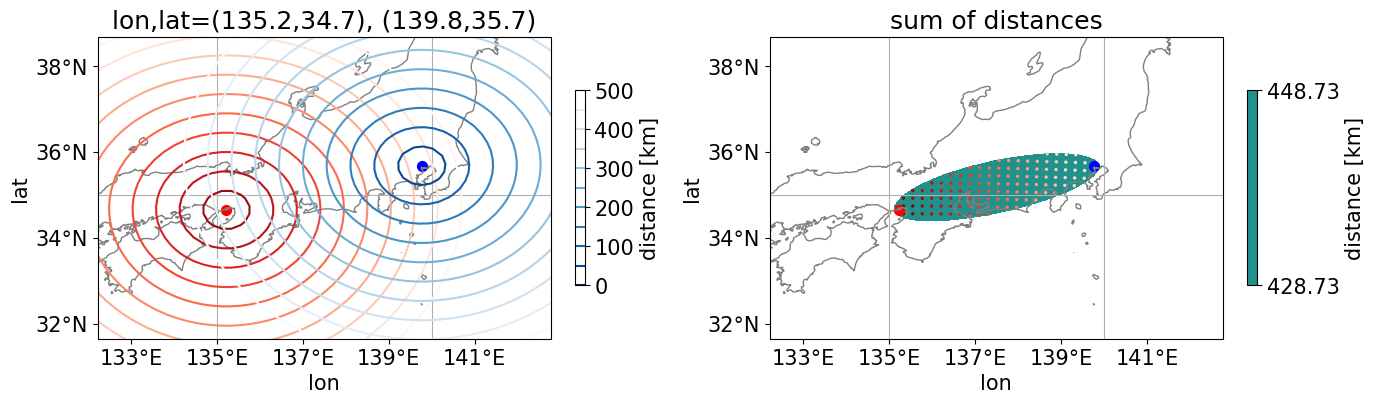

In [7]:
# Check distance from target

arg_lim_list = []
dist_along_ab_list = []

fig = plt.figure(figsize=(14,6))
axes = [
    fig.add_subplot(121,projection=ccrs.PlateCarree()),
    fig.add_subplot(122,projection=ccrs.PlateCarree())
]

for ind,ax in enumerate(axes):
    ax.coastlines('10m',color='gray')
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_aspect("equal")
    ax.set_xlabel("lon")
    ax.set_ylabel("lat")
    if ind==0:
        levels1 = np.linspace(0,500,11)
        ax.gridlines(xlocs=xticks, ylocs=yticks)
        ax.set_xlim(lon_a-3,lon_b+3)
        ax.set_ylim(lat_a-3,lat_b+3)
        ax.set_xticks(xticks_f, crs=ccrs.PlateCarree())
        ax.set_yticks(yticks_f, crs=ccrs.PlateCarree())
        cax = ax.contour(lon,lat,dist_a,levels=levels1,cmap="Reds_r")
        cax = ax.contour(lon,lat,dist_b,levels=levels1,cmap="Blues_r")
        cbar = plt.colorbar(cax,ax=ax,fraction=0.02)
        cbar.set_label("distance [km]")
        ax.set_title(f"lon,lat=({lon_a:.1f},{lat_a:.1f}), ({lon_b:.1f},{lat_b:.1f})")
    if ind==1:
        levels1 = np.linspace(dist_ab,dist_ab+dist0,2)
        ax.gridlines(xlocs=xticks, ylocs=yticks)
        ax.set_xlim(lon_a-3,lon_b+3)
        ax.set_ylim(lat_a-3,lat_b+3)
        ax.set_xticks(xticks_f, crs=ccrs.PlateCarree())
        ax.set_yticks(yticks_f, crs=ccrs.PlateCarree())
        distsum = dist_a+dist_b
        cax = ax.contourf(lon,lat,distsum,levels=levels1)
        for tmp in range(int(dist_ab//dist0)+1):
            arg_lim = (distsum.values<dist_ab+dist0)&(dist_a.values<dist0*(tmp+1))&(dist_a.values>dist0*tmp)
            arg_lim_list.append(arg_lim)
            dist_along_ab_list.append(dist0*(tmp+0.5))
            ax.scatter(lon.values[arg_lim],lat.values[arg_lim],c=tmp*np.ones_like(lat.values[arg_lim]),s=2,cmap="Reds_r",vmin=0,vmax=int(dist_ab//dist0))
            print(f"{tmp}",f", {dist0*tmp}-{dist0*(tmp+1)} km", f", # of grids: {lon.values[arg_lim].size}")
        cbar = plt.colorbar(cax,ax=ax,fraction=0.02)
        cbar.set_label("distance [km]")
        ax.set_title(f"sum of distances")

    ax.scatter(lon_a,lat_a,marker="o",color="r",s=50) # target point
    ax.scatter(lon_b,lat_b,marker="o",color="b",s=50) # target point
    
fig.tight_layout()
if savefig:
    fig.savefig(dir_out + f"distance_lon{lon_a:.1f}_lat{lat_a:.1f}_lon{lon_b:.1f}_lat{lat_b:.1f}.png")


* 変数の読込
* 上で取得した地点インデックスの値を抽出・平均し, 二点間の分布を得る

In [8]:
# Extract and average variables in the focused region
sfcvar = xrvar[sfcvarname]
uppvar = xrvar[uppvarname]
sfcvar_limmean_list = []
uppvar_limmean_list = []
for arg_lim in arg_lim_list:
    sfcvar_limmean_list.append(np.nanmean(sfcvar.values[:,arg_lim],axis=1))
    uppvar_limmean_list.append(np.nanmean(uppvar.values[:,:,arg_lim],axis=2))
sfcvar_limmean = np.array(sfcvar_limmean_list)
uppvar_limmean = np.array(uppvar_limmean_list)


* 地表変数の水平分布と, 地表変数・高層変数二地点間の分布

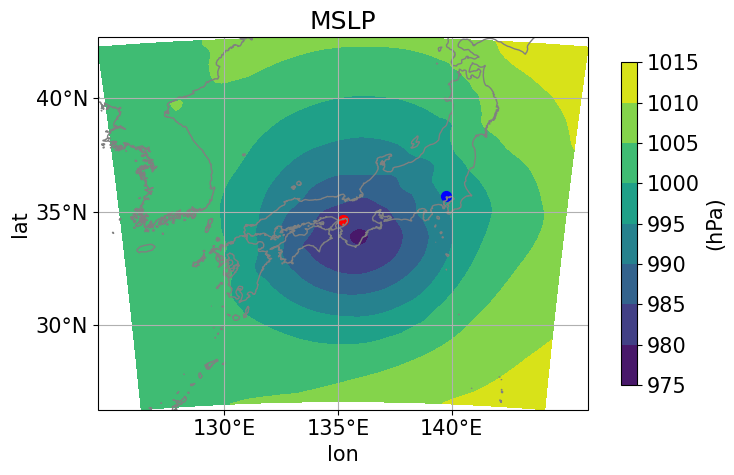

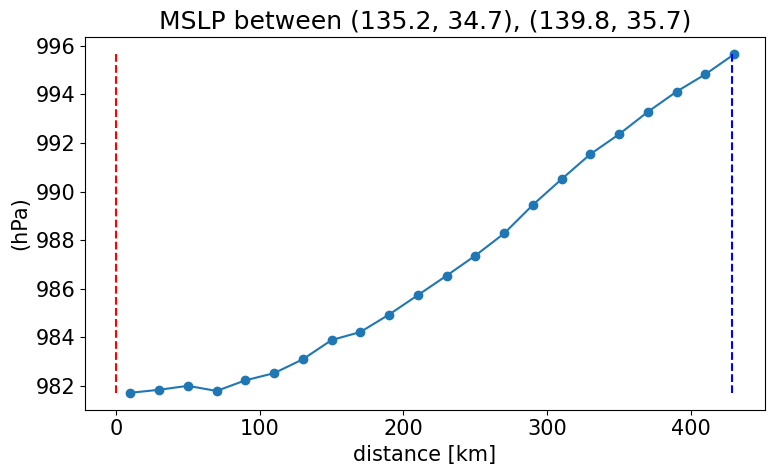

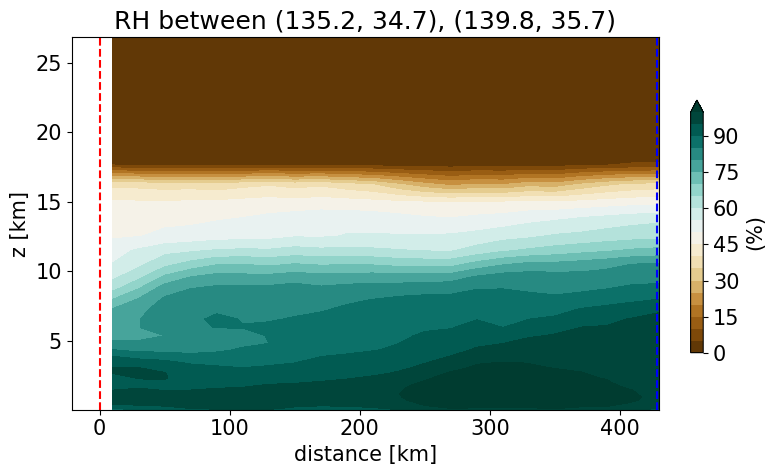

In [10]:
# Horizontal plot of time-mean surface variable
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.set_aspect("equal")
ax.set_xlabel("lon")
ax.set_ylabel("lat")
ax.coastlines('10m',color='gray')
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.gridlines(xlocs=xticks, ylocs=yticks)
cax = ax.contourf(lon,lat,np.mean(sfcvar,axis=0)*sfcvarfact)
cbar = plt.colorbar(cax,ax=ax,fraction=0.025)
cbar.set_label(sfcvarunit)
ax.scatter(lon_a,lat_a,marker="o",color="r",s=50) # target point
ax.scatter(lon_b,lat_b,marker="o",color="b",s=50) # target point
ax.set_title(sfcvarname)
fig.tight_layout()
if savefig:
    fig.savefig(dir_out + f"{sfcvarname}_lon{lon_a:.1f}_lat{lat_a:.1f}_lon{lon_b:.1f}_lat{lat_b:.1f}.png")
    
# Distribution of time-mean surface and upper variables along the line between target A and B
fig,ax = plt.subplots(figsize=(8,5))
y = np.mean(sfcvar_limmean,axis=1)*sfcvarfact
ax.plot(dist_along_ab_list,y,marker="o")
ax.vlines(0,y.min(),y.max(),color="red",linestyle="dashed")
ax.vlines(dist_ab,y.min(),y.max(),color="blue",linestyle="dashed")
ax.set_xlabel("distance [km]")
ax.set_ylabel(sfcvarunit)
ax.set_title(f"{sfcvarname} between ({lon_a:.1f}, {lat_a:.1f}), ({lon_b:.1f}, {lat_b:.1f})")
fig.tight_layout()
if savefig:
    fig.savefig(dir_out + f"{sfcvarname}_btwn_lon{lon_a:.1f}_lat{lat_a:.1f}_lon{lon_b:.1f}_lat{lat_b:.1f}.png")

fig,ax = plt.subplots(figsize=(8,5))
c = np.mean(uppvar_limmean,axis=1)*uppvarfact
cax = ax.contourf(dist_along_ab_list,z/1000,c.T,levels=uppvarlevels,cmap=uppvarcmap,extend="max")
cbar = plt.colorbar(cax,ax=ax,fraction=0.02)
cbar.set_label(uppvarunit)
ax.vlines(0,z.min()/1000,z.max()/1000,color="red",linestyle="dashed")
ax.vlines(dist_ab,z.min()/1000,z.max()/1000,color="blue",linestyle="dashed")
ax.set_xlabel("distance [km]")
ax.set_ylabel("z [km]")
ax.set_title(f"{uppvarname} between ({lon_a:.1f}, {lat_a:.1f}), ({lon_b:.1f}, {lat_b:.1f})")
fig.tight_layout()
if savefig:
    fig.savefig(dir_out + f"{uppvarname}_btwn_lon{lon_a:.1f}_lat{lat_a:.1f}_lon{lon_b:.1f}_lat{lat_b:.1f}.png")